# Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& \sum_{ij}J_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}
here,
\begin{eqnarray}
J_{ij} =\frac{J_\alpha}{N^{1-\alpha}}\sum_{(i<j)}^{N}\frac{1}{r_{ij}}=1\\
\end{eqnarray}
Putting  $\alpha = 0$ for all-to-all interaction we get,
\begin{eqnarray}
J_{ij} =\frac{J_0}{N}C^N_2=\frac{J_0}{N}\frac{N(N-1)}{2}=1\\
J_0 = \frac{2}{N-1}=KacN
\end{eqnarray}
Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, condidering $i<j$ the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{2}{N-1}(S^z)^2 - (h \cos{(\omega t )} + h_0)S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& - 2s^2_i \delta_{ij},\nonumber\\
H_0 &\rightarrow& -2s^2\\
\left(h_1\right)_{ij} &\approx& \sqrt{1 - 4s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
H_1 &\rightarrow& \sqrt{1 - 4s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

### No dc part: Localization at resonant frequencies

Let us start with $h_0=0$.

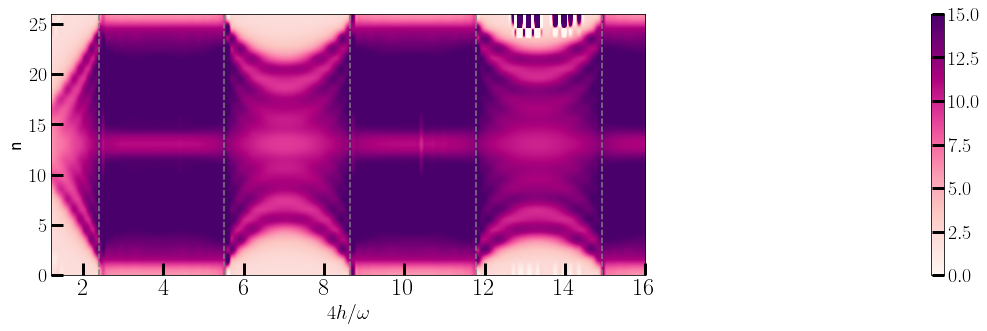

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

filename1 = 'pr_N_'+str(N)+'.jpeg'

plt.figure(figsize = (80,5))

plt.imshow(iprmat.T, interpolation='spline16', cmap='RdPu', aspect=0.25, origin='lower',extent = [4*hs[0]/w , 4*hs[-1]/w, 0 , N+1],vmin=0, vmax=15)
plt.xlabel(r"$4h/\omega$")
plt.ylabel(r"n")
plt.colorbar()
plt.savefig(filename1,dpi=500)

for pt in freezing_pts:
    plt.axvline(x=pt, color='gray', linestyle="--")
    
plt.show()

### Mobility Edges from the DC part

Let us now add a DC part to the undriven Hamiltionian, *i.e.* $h_0\neq 0$. We first look at the participation ratio of the eigenstates of the undriven part to see if mobility edges appear there. Out undriven Hamiltonian is

\begin{equation}
\hat{H}^{(U)} = \hat{H}_0 + h_0\; \hat{H}_1,
\end{equation}
with matrix elements
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{2}{N-1} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

We plot the *Inverse Participation Ratio* (IPR), defined as $\phi(n,h_0) = \left(\sum_i\left\vert\langle i |\psi_n(h_0)\rangle\right\vert^4\right)^{-1}$ for all eigenstates $|\psi_n(h_0)\rangle$ and make the following observations

1. At $h_0=0$, there is no mobility edge, as expected. All states have low IPR, indicating that they are all localized 
2. Between $[-0.08, 0.08]$, two clear mobility edges are seen, separating the localized and delocalized eigenstates. AN inner one and an outer one.
3. Beyond this regime, the inner mobility edge appears to vanish and the outer one (corresponding to edge states) remains.

running for N =  200 with 10 processors
time taken 2.179427619775136 minute


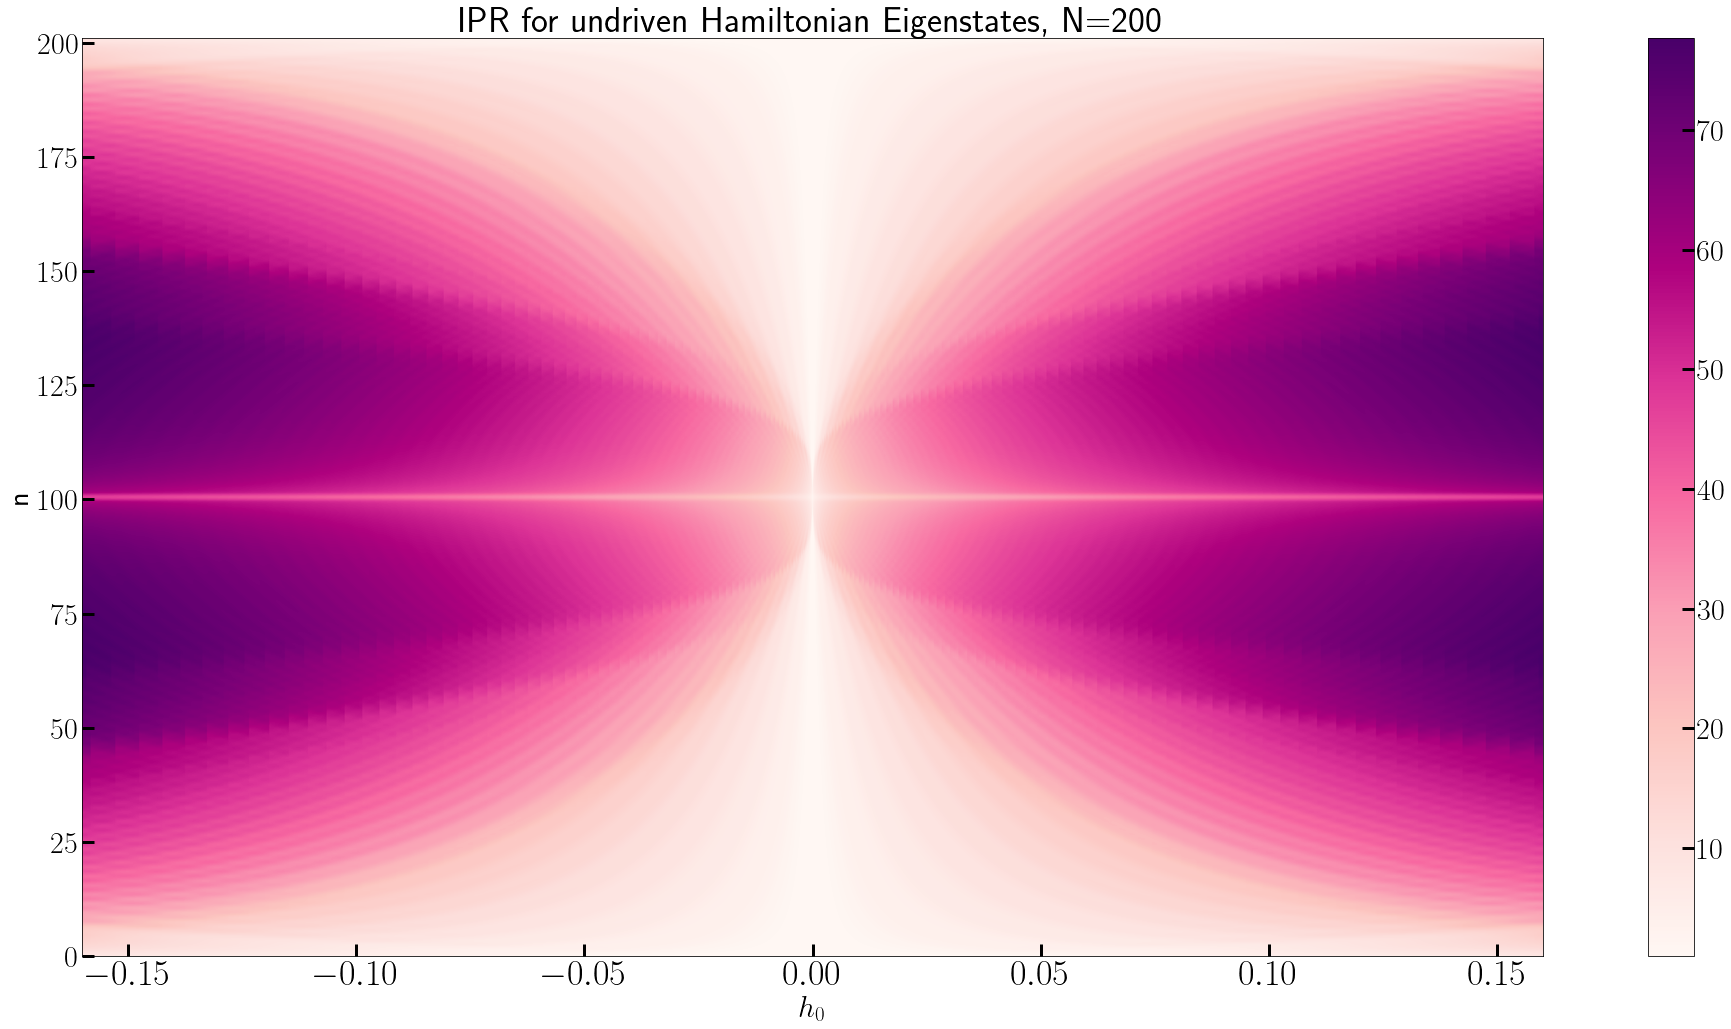

In [1]:
import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eigh
from pprint import pprint
import time

start = time.time()
plt.rcParams.update({
    #"figure.figsize": (16, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 30,
    "font.sans-serif": ["Computer Modern"]})

N = 200
h0s = np.linspace(-0.16, 0.16,15000)

if __name__ == '__main__':
    nprocs = 10
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")  
   
    s = N/2.0
    ms = np.arange(-s,s+1)
    H0 = np.diagflat((ms/N) **2)                  
    ms_p = ms[0:N]
    ms_m = ms[1:]
    H1 = (np.diagflat(np.sqrt(s * (s+1) - ms_p * (ms_p+1)), k=1) + np.diagflat(np.sqrt(s * (s+1) - ms_m * (ms_m-1)), k=-1))/N
    data = p.map(eigh,[H0 + h0 * H1 for h0 in h0s])
    iprmat = np.zeros((len(h0s),N+1))
    for xx,h0 in enumerate(h0s):
        iprmat[xx,:] = 1.0/(np.sum(np.abs(data[xx][1])**4, axis=1))
    
    print('time taken',(time.time()-start)/60,'minute')
    plt.figure(figsize = (30,15))
    plt.title(f"IPR for undriven Hamiltonian Eigenstates, N={N}")

    plt.imshow(iprmat.T, interpolation='spline16', cmap='RdPu', aspect=1/(5*N), origin='lower',extent = [h0s[0] , h0s[-1], 0 , N+1])
    plt.xlabel(r"$h_0$")
    plt.ylabel(r"n")
    plt.colorbar()
    plt.savefig("ipr_lmg.png")

### Driven problem: Floquet States with dc part


We now look at Floquet Quasienergies as a function of $\eta = 4h/\omega$, where the driven Hamiltonian is
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

and h_0 is set to both inside and outside the zone where the undriven system has an inner mobility edge. Temtatively, what we're seeing is that the resonance approximation in the analytical text is consistent with the numerics whenever the undriven part shows an inner mobility edge due to a DC field, leading to Dynamical localization at the resonance points when $J_0(\eta)=0$, with $\eta = 4h/\omega$. However, if the DC field becomes too large, level repulsion appears to occur, leading to a more-or-less delocalized profile.


TODO: Compare Floquet IPR's for both inside and outside

Note that this appears to contradict the results in the literature (CITE), where the absence of mobility edge ensures that localization occurs and remains persistent, and the presence of mobility edges results in mixing between localized and delocalized states, causing transitions that will result in a smooth distribution of IPR.

running for N =  25 with 10 processors


/tmp/ipykernel_1168179/1337268050.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(p.starmap(floq_evolv,[(psi,H0,H1,h,h0,w) for h in hs]))


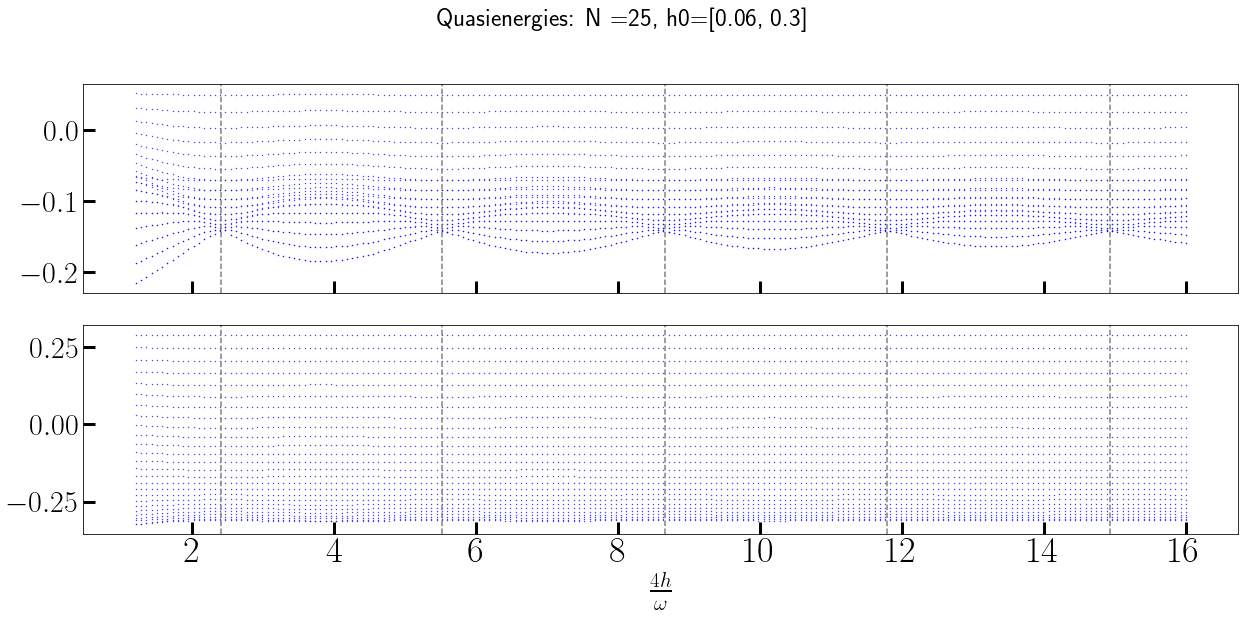

time taken 1.785265286763509 minute


In [75]:
import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
from scipy.special import jn_zeros
from scipy.special import j0
import math
import time as time
from pprint import pprint

start = time.time()
plt.rcParams.update({
    #"figure.figsize": (16, 12),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 30,
    "font.sans-serif": ["Computer Modern"]})

N = 25
h0s = [0.06, 0.3]
omega = 90
w = omega
tsteps = 1000

hsteps = 200
h1 = (1/4) * omega * 1.2
h2 = (1/4) * omega * 16.0 
hs = np.linspace(h1, h2, hsteps)

psi = np.eye(N+1) + 1j * np.zeros((N+1,N+1))

fig, axs = plt.subplots(len(h0s),1, sharex='col', figsize=(18,9))
fig.suptitle(f'Quasienergies: N ={N}, h0={h0s}' ,fontsize = 25)

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * (H0  + drive * H1) * N             
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_evolv(psi,H0,H1,h,h0,w):
    T = 2 * np.pi/w                                  
    t = np.linspace(0,T,tsteps)                   
    floqEvolution_mat = np.zeros((N+1,N+1)) + 1j * np.zeros((N+1,N+1))
    for m in np.arange(N+1):
        psi0 = psi[m]/(psi[m].T.conj() @ psi[m])
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))
        floqEvolution_mat[m] = psi_t[-1]/(psi_t[-1].T.conj() @ psi_t[-1]) 
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * np.log(evals + 1j * 0) /(N * T)             #introduced N
    return [h,phasefunc.real,evecs]


if __name__ == '__main__':
    nprocs = 10
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")  
   
    s = N/2.0
    ms = np.arange(-s,s+1)
    H0 = np.diagflat((ms/N) **2)                  
    ms_p = ms[0:N]
    ms_m = ms[1:]
    H1 = (np.diagflat(np.sqrt(s * (s+1) - ms_p * (ms_p+1)), k=1) + np.diagflat(np.sqrt(s * (s+1) - ms_m * (ms_m-1)), k=-1))/N
    
    for i, h0 in enumerate(h0s):
        data = np.array(p.starmap(floq_evolv,[(psi,H0,H1,h,h0,w) for h in hs]))
        h_f = np.array(data[:,0])
        phs_f = np.array(data[:,1])
        evec_f = np.array(data[:,2])
        
        for xx,h in enumerate(hs):
            #Get the previous Floquet Eigensystem
            if xx == 0:
                evals_prev = phs_f[xx].real
                evecs_prev = evec_f[xx]
            else:
                evals_prev = phs_f[xx-1].real
                evecs_prev = evec_f[xx-1]

            #Sort the Floquet states of this itertaion accordingly to orthonormality with the previous ones
            evals_curr = phs_f[xx].real
            evecs_curr = evec_f[xx]
            condition = np.abs(np.around(evecs_prev.T.conj() @ evecs_curr, 0))
            evals_curr = evals_curr[np.argmax(condition, axis=1)]        
            evecs_curr = evecs_curr[:,np.argmax(condition, axis=1)]
            axs[i].scatter(4 * h * np.ones(N+1)/w, evals_curr, color = 'blue', marker='.', s = 0.5)

    for pt in freezing_pts:
        axs[0].axvline(x=pt, color='gray', linestyle="--")
        axs[1].axvline(x=pt, color='gray', linestyle="--")
    
    axs[-1].set_xlabel(r'$\frac{4h}{\omega}$')
    plt.show()
    
print('time taken',(time.time()-start)/60,'minute')